In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

import os
import scipy

import sklearn
import sklearn.feature_selection
import sklearn.ensemble

import fnmatch

import graphviz
import mpl_toolkits.mplot3d as plt3dd

import seaborn

import time

In [2]:
path_gdp = r".\Data\Africa_GDP.csv";

In [3]:
gdp_df = pandas.read_csv(path_gdp); 

countries_list = gdp_df.columns[gdp_df.columns != "Year"];

GDP_growth_perc = "_GrowthGDP";

In [4]:
gdp_df

,Year,Algeria,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Eswatini,...,Seychelles,Sierra Leone,Somalia,South Africa,Sudan,Tanzania,Togo,Uganda,Zambia,Zimbabwe
0,1960,2.723615e+09,2.261956e+08,3.041141e+07,3.304428e+08,1.960000e+08,6.142061e+08,1.121556e+08,3.135827e+08,3.507685e+07,...,1.201202e+07,3.221515e+08,1.804599e+08,8.748597e+09,1.127011e+09,2.651730e+09,1.710571e+08,4.230084e+08,7.130000e+08,1.052990e+09
1,1961,2.434747e+09,2.356682e+08,3.290261e+07,3.502472e+08,2.030000e+08,6.527776e+08,1.231346e+08,3.339753e+08,4.302604e+07,...,1.159202e+07,3.279792e+08,1.916599e+08,9.225996e+09,1.223563e+09,2.826179e+09,1.784971e+08,4.415241e+08,6.962857e+08,1.096647e+09
2,1962,2.001445e+09,2.364350e+08,3.564496e+07,3.795671e+08,2.135000e+08,6.942479e+08,1.244828e+08,3.576357e+08,4.592796e+07,...,1.264203e+07,3.428727e+08,2.035319e+08,9.813996e+09,1.329023e+09,3.101590e+09,1.867458e+08,4.490126e+08,6.931429e+08,1.117602e+09
3,1963,2.702982e+09,2.539277e+08,3.809184e+07,3.940407e+08,2.327500e+08,7.183208e+08,1.293791e+08,3.717670e+08,5.412944e+07,...,1.392303e+07,3.487007e+08,2.161459e+08,1.085420e+10,1.352011e+09,3.456579e+09,2.023059e+08,5.161478e+08,7.187143e+08,1.159512e+09
4,1964,2.909316e+09,2.698190e+08,4.161635e+07,4.103216e+08,2.607500e+08,7.766502e+08,1.420251e+08,3.922475e+08,6.498055e+07,...,1.539303e+07,3.720121e+08,2.295299e+08,1.195600e+10,1.389080e+09,3.748841e+09,2.345722e+08,5.890566e+08,8.394286e+08,1.217138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,1.934600e+11,1.439071e+10,1.672591e+10,1.603281e+10,2.576519e+09,3.966776e+10,2.221301e+09,1.131495e+10,4.495267e+09,...,1.868690e+09,4.076579e+09,9.420431e+09,3.893300e+11,3.233808e+10,6.102673e+10,6.992700e+09,3.534816e+10,2.330867e+10,2.183223e+10
60,2020,1.648730e+11,1.568674e+10,1.496029e+10,1.772501e+10,2.649680e+09,4.077324e+10,2.326721e+09,1.071540e+10,3.982237e+09,...,1.382552e+09,4.062906e+09,9.204140e+09,3.382910e+11,2.703459e+10,6.606874e+10,7.400284e+09,3.760037e+10,1.813776e+10,2.150970e+10
61,2021,1.862650e+11,1.768762e+10,1.875095e+10,1.964317e+10,2.775799e+09,4.499352e+10,2.516498e+09,1.177998e+10,4.850843e+09,...,1.487174e+09,4.249235e+09,9.838712e+09,4.201180e+11,3.422951e+10,7.065563e+10,8.342244e+09,4.052979e+10,2.209642e+10,2.837124e+10
62,2022,2.255600e+11,1.742542e+10,2.032196e+10,1.882022e+10,3.338723e+09,4.364407e+10,2.382619e+09,1.239681e+10,4.790923e+09,...,2.057969e+09,4.094564e+09,1.041954e+10,4.052710e+11,5.166688e+10,7.576997e+10,8.169476e+09,4.556533e+10,2.916378e+10,2.736663e+10


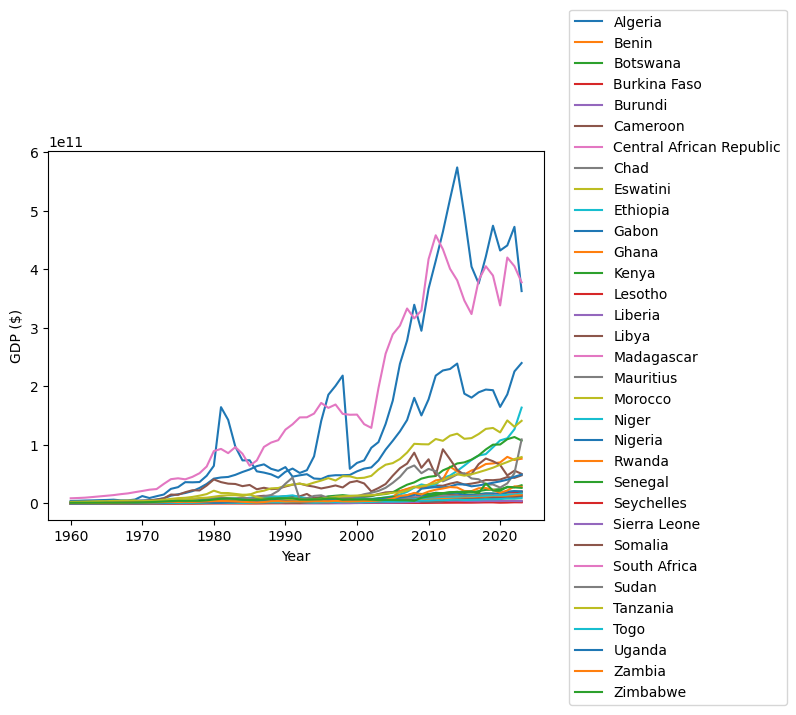

In [5]:
plt.figure()

for col in countries_list:
    plt.plot(gdp_df["Year"], gdp_df[col], label=col);

plt.ylabel("GDP ($)");
plt.xlabel("Year");
plt.legend(loc=[1.05, -0.50]);

To predict the GDP of a single country (relative to other countries) the following assumptions are made:

- A countries GDP is proportional (to a certain degree) to other (neighbouring/trading/partner) countries
- The GDP growth % of a relevant country will also have an impact on the target countries GDP

With that being said additional variables and data are needed to more granuarly predict the GDP growth/decline of a country ($\textit{eg}$ econmical, political, logistical factors being important variables that are not accounted for here). To fudge for this factor we can aproximate the countries according to groupings. The groupings can be made with a unsupervised learing mode. Initial groupings will be set to 4 (depending on performace). The hopes are that the categories might group according to a trend. With the current data the following groupings are possibel to fudge:

1) High GDP stable growth
2) High GDP unstable/bad growth
3) Low GPD stable growth
4) Low GPB unstable/bad

Without properly analysing the resulting the categories the relevance of the counties cannoth be deciphered. Adding too much categories might lead to overfitting. For now 2 machine learning models will be tested:

1) Without groupings
2) With groupings (using dummy columns/ variables)

We can preprocess some data for better results. The more non-linear the data is the harder it is to predict with a linear model. To this account for this a natural logarithm is applied to the GDP. 

In [348]:
gdp_preproc_df = pandas.DataFrame(); 

for country in countries_list:
    gdp_preproc_df[country + GDP_growth_perc] = gdp_df[country].diff() / gdp_df[country]
    gdp_preproc_df[country] = numpy.log(gdp_df[country]);

gdp_preproc_df["Year"] = gdp_df["Year"];

gdp_preproc_df.dropna(inplace=True);    # adter applying the differential remove the NA, THe growth perc is based on the previous year

In [350]:
countries_list.any()

'Algeria'

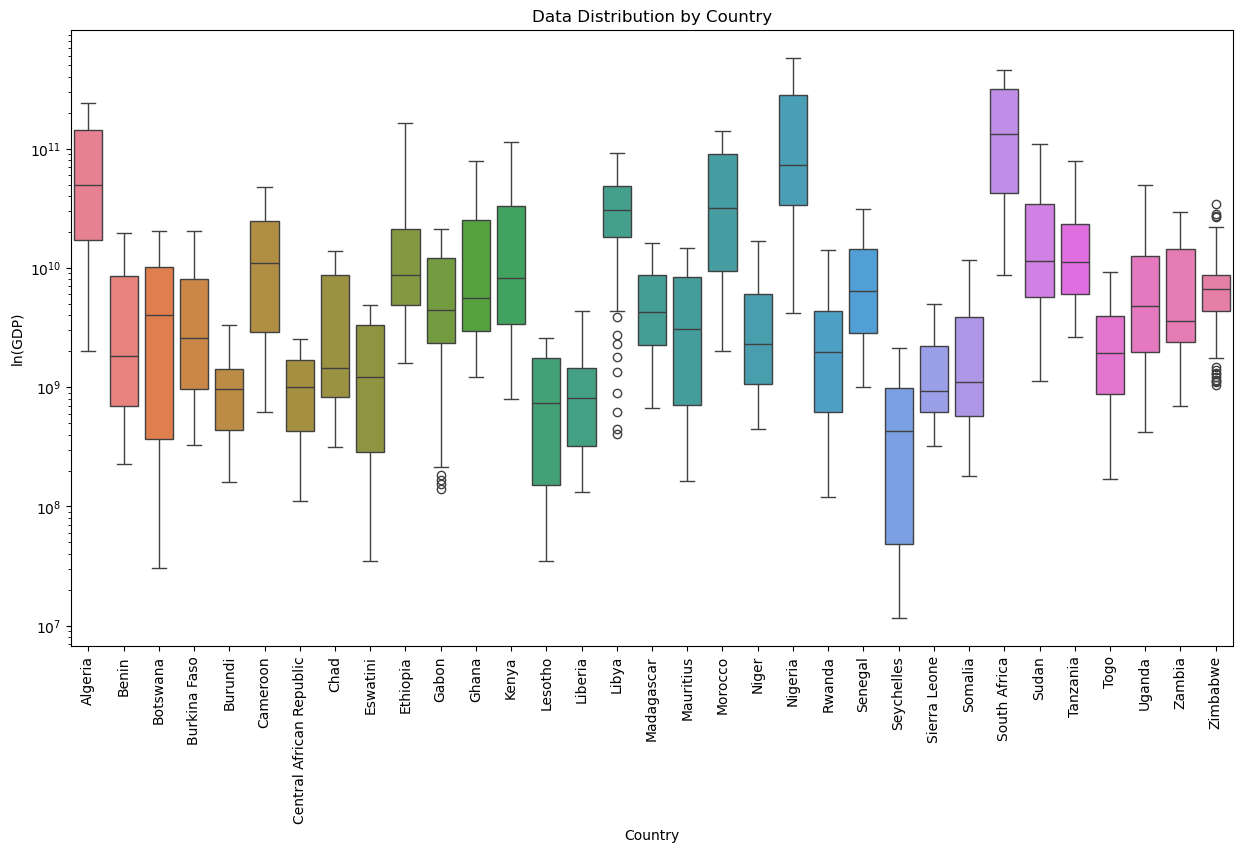

In [352]:
plt.figure(figsize=(15, 8));
seaborn.boxplot(gdp_df[countries_list], log_scale=True);
plt.xticks(rotation=90)
plt.title("Data Distribution by Country")
plt.xlabel("Country");
plt.ylabel("ln(GDP)");
plt.show()

Looking at the above graph, the following groupings can be geustimated:

1) Countries with a large or small variance (Seychelles, Zimbabwe)
3) Countries with where abs(Q3 - Median) > abs(Q1 - Median) and vice versa  ( doesn taccount for positive growth in the last couple of years)
4) Countries with high, average and low GDPs
5) Countires with a significant outliers (Zimbabwe, Libya)
6) Good faring landlocked (Botswanna / Namibia)
7) Bad faring landlocked 
8) Good faring with seaside acces (South Africa / Nigeria)
9) Bad faring with seaside acces (Zimbabwe)


Only upon closer inspection can the resulting groupings be named

# Manually build and compare models

In [356]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.base import RegressorMixin
from sklearn.model_selection import train_test_split

In [358]:
target = "South Africa";

In [360]:
mdl_dct = dict(model = LinearRegression, init_vals = {});
md2_dct = dict(model = Ridge, init_vals = {"alpha" : 1});

In [362]:
def split_data(dataFrame : pandas.DataFrame, target : str, shuffle=False):
    target_mask = dataFrame.columns == target;
    X_data = dataFrame[dataFrame.columns[~target_mask]].to_numpy();   # get x data in array format
    y_data = dataFrame[dataFrame.columns[target_mask]].to_numpy();    # get y data in array format

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0, shuffle=shuffle, train_size=0.85);
    return [X_train, X_test, y_train, y_test];


def compare_linear_models(X_train : numpy.array, 
                          y_train : numpy.array, 
                          X_test : numpy.array, 
                          y_test : numpy.array, 
                          *args : dict):                              
                          
    """Models require a model with 'predict' and 'fit' method functions"""
    models = [];
    for arg in args:
        if ("model" in arg) and ("init_vals" in arg):                  # check if correct keys (hopefully with correct parameters)
                  models.append(arg["model"](**arg["init_vals"]));     # are in dict. This appens :-> model(**kwarga) to models list
    
    for model in models: 
        model.fit(X_train, y_train);                                         # fit X_data
        print("{:} : {:.2%}".format(type(model).__name__,
                                     model.score(X_test, y_test)));       # get test data scores

        # grid searcg and cross validation can be used here, but for the 
        # purposes of bot over engineering a simple problem with a limited data 
        # set it is not used 

    return models;

In [364]:
gdp_ln = pandas.DataFrame();

for country in countries_list:
    gdp_ln[country] = numpy.log(gdp_df[country]);

gdp_ln["Year"] = gdp_df["Year"];

In [921]:
# dif
shuffle = False;
X_tr_gdp, X_te_gdp, y_tr_gdp, y_te_gdp = split_data(gdp_df, target, shuffle=shuffle);
X_tr_ln, X_te_ln, y_tr_ln, y_te_ln = split_data(gdp_ln, target, shuffle=shuffle);
X_tr_pp, X_te_pp, y_tr_pp, y_te_pp =  split_data(gdp_preproc_df, target, shuffle=shuffle);

In [923]:
# build model based on given GDP data
[LR_gdp, RR_gdp] = compare_linear_models(X_tr_gdp, y_tr_gdp, 
                                         X_te_gdp, y_te_gdp,
                                         mdl_dct, md2_dct);

LinearRegression : -3784.61%
Ridge : -3780.24%


B:\Anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.22369e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [925]:
# build model based on ln(GDP) columns
[LR_gdp, RR_gdp] = compare_linear_models(X_tr_ln, y_tr_ln, 
                                         X_te_ln, y_te_ln,
                                         mdl_dct, md2_dct);

LinearRegression : 26.48%
Ridge : -167.13%


In [927]:
# build  model on preprocssed nata with "ln(GDP)" and "GDP_growth" columns
[LR_pp, RR_pp] = compare_linear_models( X_tr_pp, y_tr_pp, 
                                         X_te_pp, y_te_pp,
                                         mdl_dct, md2_dct);

LinearRegression : -77.76%
Ridge : -299.65%


## Plot data

In [938]:
def plot_base_gdp(target = "South Africa"):
    plt.plot(df_gdp["Year"], Ydf_gdp[target], label="Base data");
    return;

def plot_model(X, model, /, ln_scaling=True):
    for x in X:
        mask_year = (x >= 1964) & (x <= 2024);                # filter out in which col the year is using array indexing
        if mask_year.sum() > 1: break;                        # break if we found the one. This asusmes all row inpus are consisntent

    y = model.predict(X);
    
    if ln_scaling: y = numpy.exp(y);
    plt.scatter(X[:,mask_year], y, 60, "m", ".", edgecolors="k", label=f"{type(model).__name__}");
    


def do_moving_average(X, y, window=3):
    """Only do mnoving average for 2 columned variables"""
    df = pandas.DataFrame(dict(X = X, y = y));

    df_return = df.rolling(window=window, center=True).mean().dropna();
    return [df_return.X, df_return.y];




def plot_trend(X, y, /, window=8, label="Trend line"):
    X, y = do_moving_average(X, y, window);
    plt.plot(X, y, '--k', label=label)




def plot_data(X_trian, X_test, y_train, y_test, /, ln_scaling=True):
    for row in X_trian:
        mask_year = (row >= 1964) & (row <= 2024);            # filter out in which col the year is using array indexing 
        if mask_year.sum() > 1: break;                        # break if we found the one. This asusmes all row inpus are consisntent
            
    if ln_scaling:
        y_train = numpy.exp(y_train);
        y_test = numpy.exp(y_test);
        
    plt.plot(X_trian[:,mask_year], y_train, 'or', label = "Train");        
    plt.plot(X_test[:,mask_year], y_test, 'x', color="lime", label = "Test");

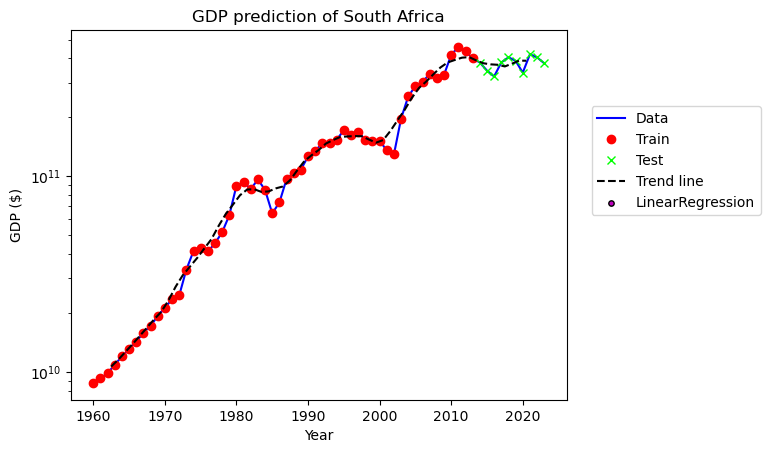

In [954]:
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1);

plt.plot(gdp_df["Year"], gdp_df[target], '-b', label="Data");
plot_data(X_tr_ln, X_te_ln, y_tr_ln, y_te_ln, ln_scaling=True);
plot_trend(gdp_df["Year"], gdp_df[target],6)

plot_model(X, LR_gdp, False);

plt.title(f"GDP prediction of {target}")
plt.ylabel("GDP ($)");
plt.xlabel("Year");
plt.legend(loc=[1.05, 0.50]);




ax.set_yscale("log");
plt.show();

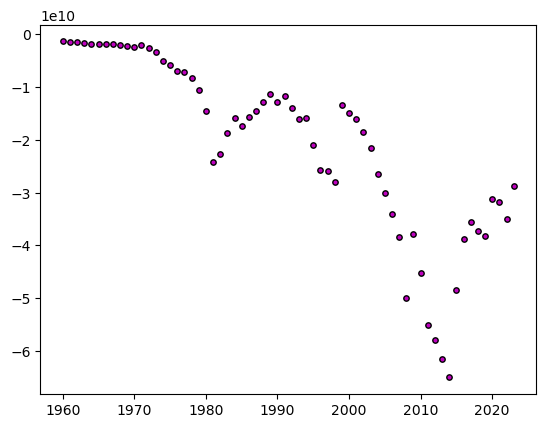

In [956]:
fig = plt.figure();
ax = fig.add_subplot(1, 1, 1);
plot_model(X, LR_gdp, False);